In [96]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
#mpl.style.use('classic')
from sklearn import datasets as ds

In [97]:
iris = ds.load_iris()
print("Loaded iris data with %d records" % len(iris.data))

Loaded iris data with 150 records


Load iris data into a Pandas table.  The <code>numpy.c_</code> method concatenates the input and target variables.

Code from <a href="https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset">this thread</a>.

In [98]:
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                    columns=iris['feature_names'] + ['target'])
#df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null float64
dtypes: float64(5)
memory usage: 5.9 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


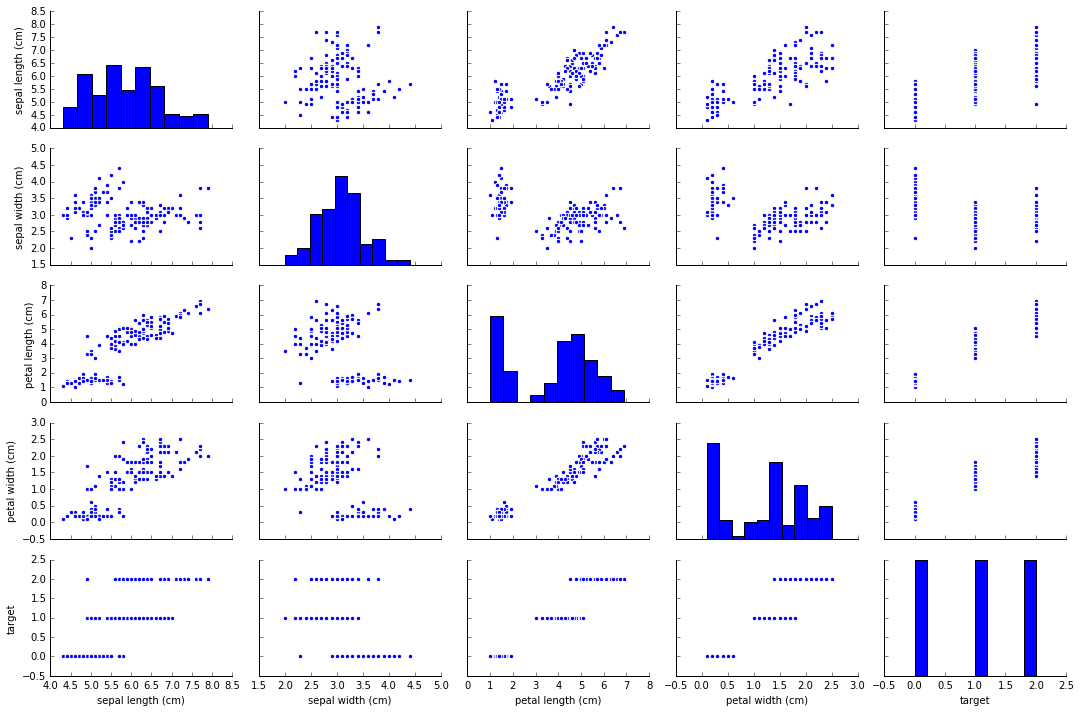

In [99]:
from seaborn import pairplot
pairplot(df, size=2.0, aspect=1.5)

<h2>Plot Class for Each Pair of Features</h2>

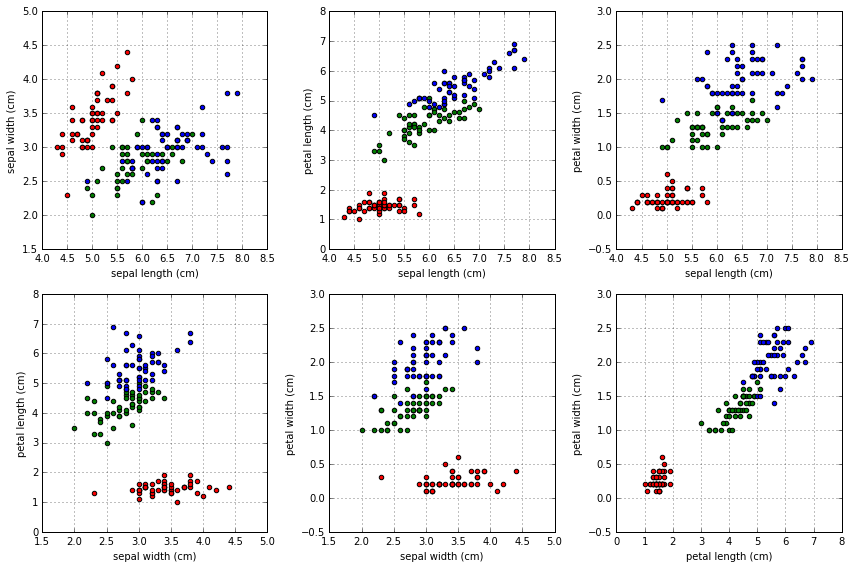

In [100]:
fig, axes = plt.subplots(nrows=2, ncols=3)

fig.set_size_inches(12, 8)

colors = ['r','g','b']
for i in range(3): 
    tmp = df[df.target == i]
    tmp.plot(x=0,y=1, kind='scatter', c=colors[i], ax=axes[0,0])
    
for i in range(3): 
    tmp = df[df.target == i]
    tmp.plot(x=0,y=2, kind='scatter', c=colors[i], ax=axes[0,1])
    
for i in range(3): 
    tmp = df[df.target == i]
    tmp.plot(x=0,y=3, kind='scatter', c=colors[i], ax=axes[0,2])
    
for i in range(3): 
    tmp = df[df.target == i]
    tmp.plot(x=1,y=2, kind='scatter', c=colors[i], ax=axes[1,0])
    
for i in range(3): 
    tmp = df[df.target == i]
    tmp.plot(x=1,y=3, kind='scatter', c=colors[i], ax=axes[1,1])
    
for i in range(3): 
    tmp = df[df.target == i]
    tmp.plot(x=2,y=3, kind='scatter', c=colors[i], ax=axes[1,2])

# Turn on grid lines for axes
for i in range(2):
    for j in range(3):
        axes[i,j].grid(True, which='both')
    
plt.tight_layout()

<h2>Perform Classification</h2>

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split, cross_val_score

# Use KNN classifier
clf = KNeighborsClassifier(3)

# Perform test/train split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=12)

# Train the classifier
clf.fit(X_train, y_train)

# Perform predictions and score
clf.score(X_test, y_test)

0.9777777777777777

<h2>Color Map Plot of Decision Boundaries</h2>

In [102]:
from matplotlib.colors import ListedColormap

# Use only 2 fields for the this visualization
clf = KNeighborsClassifier(11, weights='uniform')
clf.fit(iris.data[:, 2:4], iris.target)

# Step size in the mesh
h = 0.01

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Define plot boundaries
x_min, y_min = df.min()[['petal length (cm)', 'petal width (cm)']]
x_max, y_max = df.max()[['petal length (cm)', 'petal width (cm)']]

Numpy function to create coordinate grid<br/>
<a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html">numpy.meshgrid</a>

In [103]:
# Create coordinate grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

<p>
Numpy function to concatenate matrices<br/>
<a href="https://docs.scipy.org/doc/numpy-1.6.0/reference/generated/numpy.c_.html#numpy.c_">numpy.c_</a>
</p> 
    
<p>
Numpy function to create 1D array from matrices<br/>
<a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html">numpy.ravel</a>
</p>

In [109]:
# Predict class for every coordinate in the grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

In [105]:
# Reshape predictions to overlay on grid
Z = Z.reshape(xx.shape)

Text(0.5,1,"3-Class classification (k = 11, weights = 'uniform')")

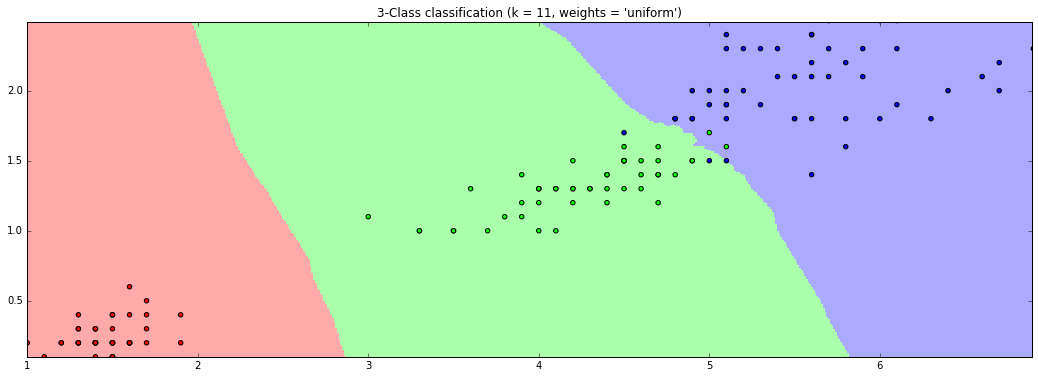

In [106]:
# Plot the decision boundaries and the training points
plt.figure(figsize=(18,6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=iris.target, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = {}, weights = '{}')".format(clf.n_neighbors, clf.weights))